# Campaign Response Prediction
## Data Analysis



The superstore is planning a year-end sale and aims to introduce a new gold membership offer. This offer provides a 20% discount on all purchases for only 499 dollars, significantly reduced from the usual 999 dollars. The offer is exclusively available to existing customers, and the marketing campaign will be conducted through phone calls.

To optimize the cost of this campaign, the superstore intends to build a predictive model. This model will classify customers based on the likelihood of them purchasing the gold membership offer. The goal is to predict the probability of a positive response from the customers and identify the key factors influencing their decision.

The data used for building the predictive model comes from last year's campaign. This historical data includes information about customer demographics, purchase behavior, and their response to previous offers. By analyzing this data, we aim to uncover patterns and insights that will help predict customer responses for the current campaign.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

%matplotlib inline

Setting up plotting enviroment

In [2]:
random.seed(9)
tab20b_colors = sns.color_palette('tab20b')
tab20b_colors_list = list(tab20b_colors)
random.shuffle(tab20b_colors_list)
sns.set_palette(tab20b_colors_list)

Bringing in the data

In [3]:
df = pd.read_csv('superstore_data.csv')

## Data Features

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

Year_Birth - Age of the customer

Complain - 1 if the customer complained in the last 2 years

Dt_Customer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website

NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase



## Data Overveiw and Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#moved target variable to the front for easier viewing
column_to_move = 'Response'
first_column = df.pop(column_to_move)
df.insert(0, column_to_move, first_column)

In [6]:
pd.set_option('display.max_columns', None)
df.head(10)

,Response,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0
1,1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0
2,0,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0
3,0,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0
4,1,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,0
5,1,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,0
6,1,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,0
7,0,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,0,11,0,0,7,1,2,1,3,5,0
8,0,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0
9,0,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0


In [8]:
df.describe()

,Response,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.149107,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,0.356274,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,0.000000,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,0.000000,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


Based on the above we see that Year_Birth and Income probably has some data that was input incorrelty.

The other columns look to be fine, but Kidhome, Teenhome, Response and Complain have majority to be 0

In [7]:
#checking for any duplicate rows or customers
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(f"Number of duplicate IDs: {df.duplicated(subset='Id').sum()}")

Number of duplicate rows: 0
Number of duplicate IDs: 0


In [8]:
#Changed the response to accepted and rejected for easier use in the plots
df.Response = df.Response.replace({0:'Declined', 1:'Accepted'})

In [9]:
#Changed complain to yes and no for easier use in the plots
df.Complain = df.Complain.replace({0:'No', 1:'Yes'})

In [10]:
#getting age from the time of campaign
df['Age'] = 2023 - df['Year_Birth']

In [11]:
#removeing unnecessary columns
df = df.drop(columns=['Year_Birth','Id'])

In [12]:
#Income is the only column with Nulls so looking into those further
print(f"Total Income Nulls: {df.Income.isna().sum()}")
df[df.Income.isna()].head(10)

Total Income Nulls: 24


,Response,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
134,Declined,PhD,Married,NaN,2,1,11/19/2012,4,230,42,192,49,37,53,12,7,2,8,9,No,66
262,Declined,Graduation,Married,NaN,1,0,11/15/2013,11,5,5,6,0,2,1,1,1,0,2,7,No,40
394,Declined,PhD,Together,NaN,1,0,2/3/2014,17,25,1,13,0,0,3,1,1,0,3,7,No,51
449,Declined,Graduation,Single,NaN,1,0,2/20/2013,19,5,1,3,3,263,362,0,27,0,0,1,No,37
525,Declined,PhD,Married,NaN,0,1,11/7/2013,23,352,0,27,10,0,15,3,6,1,7,6,No,62
590,Declined,2n Cycle,Married,NaN,1,0,9/14/2012,25,25,3,43,17,4,17,3,3,0,3,8,No,50
899,Declined,Master,Together,NaN,0,1,1/4/2013,39,187,5,65,26,20,14,2,4,2,6,5,No,53
997,Declined,Graduation,Single,NaN,1,1,5/27/2014,45,7,0,8,2,0,1,1,1,0,2,7,No,66
1096,Declined,2n Cycle,Single,NaN,1,1,12/1/2014,49,5,1,9,2,0,4,1,1,0,2,7,No,59
1185,Declined,Master,Together,NaN,1,1,5/18/2013,52,375,42,48,94,66,96,7,4,10,4,3,No,54


Text(0.5, 1.0, 'Income with outliers')

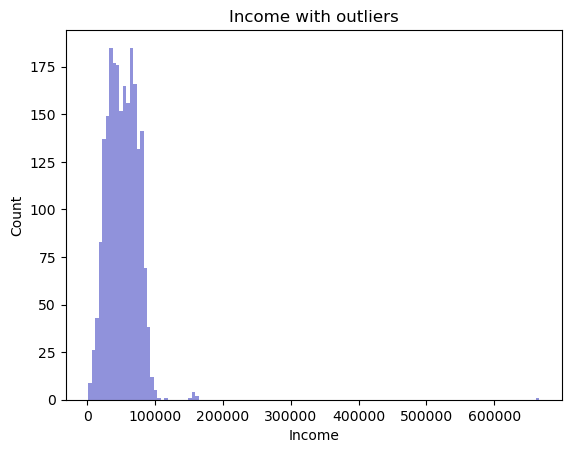

In [15]:
#historgram of Income
sns.histplot(x=df.Income,edgecolor=None )
plt.title('Income with outliers')

There is an outlier in the 600,000 range.

I decided to treat like it was a null

In [13]:
df_income = df[df['Income']!= 666666.0]
df.loc[df['Income']==666666.0, 'Income'] = np.nan

Text(0.5, 1.0, 'Income without outlier')

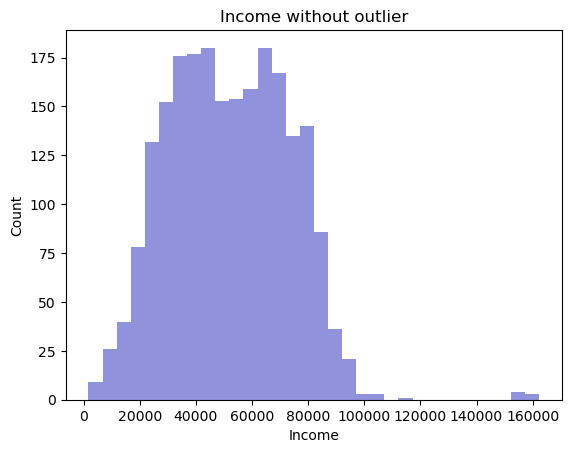

In [17]:
sns.histplot(x=df.Income,edgecolor=None )
plt.title('Income without outlier')

First, to remove the typical outliers above 110,000, I added an upper limit of 110,000

In [14]:
df['Income'] = df['Income'].clip(upper=110000)

In [15]:
mode=df['Income'].value_counts()[df.Income.mode()]
print(f"Income Mode: {mode}")
print(f"Icome Mean: {df.Income.mean()}, Income Median: {df.Income.median()}")

Income Mode: 7500.0    12
Name: Income, dtype: int64
Icome Mean: 51816.40586907449, Income Median: 51373.0


I could've replaced the Nulls with the mean or median but I decided to check if there was a difference in income based on response or education

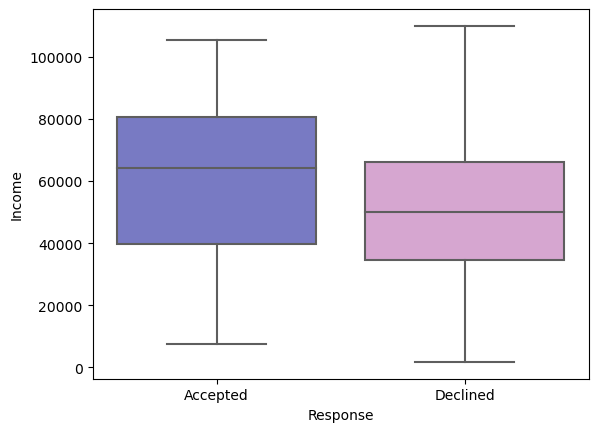

In [20]:
sns.boxplot(x=df.Response, y=df.Income)
plt.show()

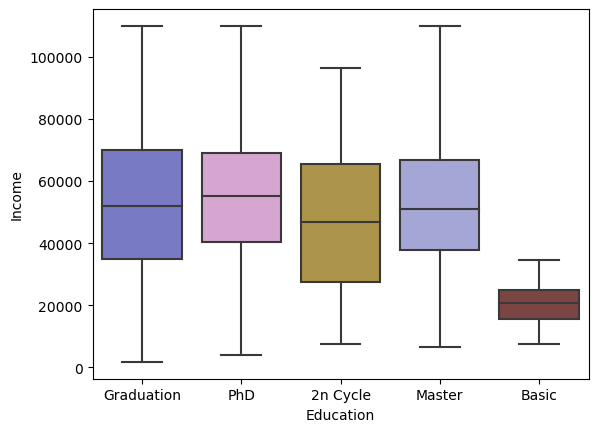

In [21]:
sns.boxplot(x=df.Education, y=df.Income)
plt.show()

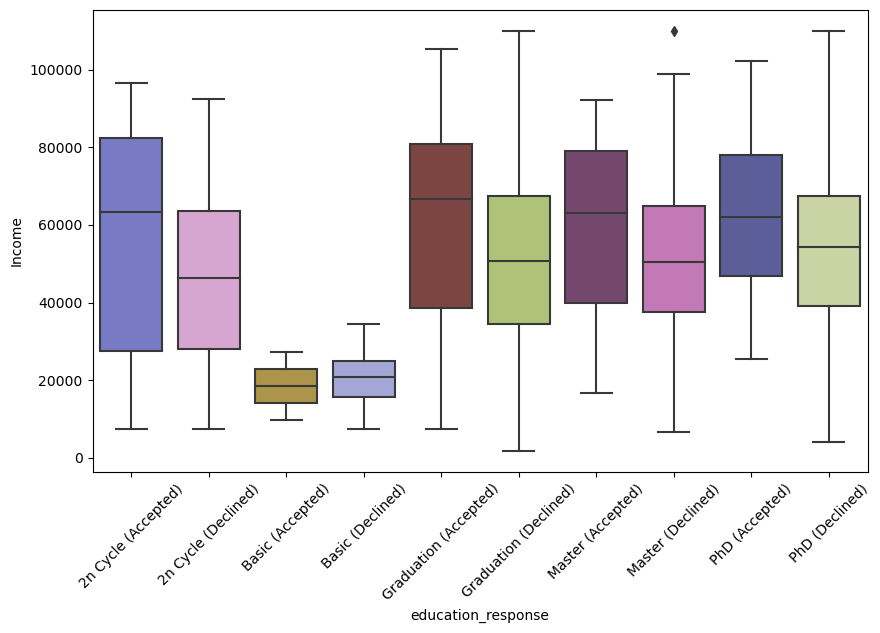

In [16]:
#I created a temporary column to plot by education and response together
df['education_response'] = df['Education']+" (" + df['Response'].astype(str) + ")"
df_copy = df.copy()
df_copy = df_copy.sort_values(by='education_response')
plt.figure(figsize=(10,6))
sns.boxplot(x = df_copy['education_response'], y=df_copy.Income)
plt.xticks(rotation=45)
plt.show()

there is a significant difference in income when the data is divided by education and response. I fill the Null values with the mean when the data is grouped by these categories.

In [17]:
group_means = df.groupby('education_response')['Income'].transform(lambda x: float(int(x.mean())))
df.Income = df.Income.fillna(group_means)
df = df.drop(columns=['education_response'])

#checking all nulls were filled
print(f"Total Income Nulls: {df.Income.isna().sum()}")

Total Income Nulls: 0


I left the rest of the Income outliers and didnt remove them as I felt they are valid data and wouldnt throw off the model too much.

In [18]:
#looking at the age column for the years that are too old
df[df.Age > 85]

,Response,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
513,Declined,2n Cycle,Single,60182.0,0,1,5/17/2014,23,8,0,5,7,0,2,1,1,0,2,4,No,130
827,Declined,PhD,Together,83532.0,0,0,9/26/2013,36,755,144,562,104,64,224,1,4,6,4,1,No,124
2233,Declined,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,6,8,7,4,25,1,2,1,2,5,Yes,123


The mean, median and mode are all very similar in the age categoy so I fill the 3 outliers with the mean

In [19]:
print(f"Age Mode: {df['Age'].value_counts()[df.Age.mode()]}")
print(f"Age Median: {df.Age.median()}, Age Mean: {df.Age.mean()}")

Age Mode: 47    89
Name: Age, dtype: int64
Age Median: 53.0, Age Mean: 54.19419642857143


In [20]:
df.loc[df['Age']>100, 'Age'] = np.nan
df.Age = df.Age.fillna(int(df.Age.mean()))

I changed the Dt_Customer column to Tenure as it will be more understandable

In [21]:
#Change Dt_Customer to Tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Tenure'] = ((pd.Timestamp('2023-01-01') - df['Dt_Customer']).dt.days / 365.25).round(2)

In [22]:
df = df.drop(columns=['Dt_Customer'])

In [23]:
df.head()

,Response,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Tenure
0,Accepted,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,No,53.0,8.54
1,Accepted,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,No,62.0,8.55
2,Declined,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,No,65.0,8.64
3,Declined,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,No,56.0,8.16
4,Accepted,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,No,34.0,8.41


I consolidated some similar marital statuses

In [24]:
#how many categories are there
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [25]:
#consolidated some of the categories
df.Marital_Status = df['Marital_Status'].replace(['Divorced','Widow'], 'Divorced/Widow')
df.Marital_Status = df['Marital_Status'].replace(['YOLO','Alone','Absurd'], 'Unknown')

## Feature Distribution

Percentages of the response/target variable:
Declined: 85.09%
Accepted: 14.91%


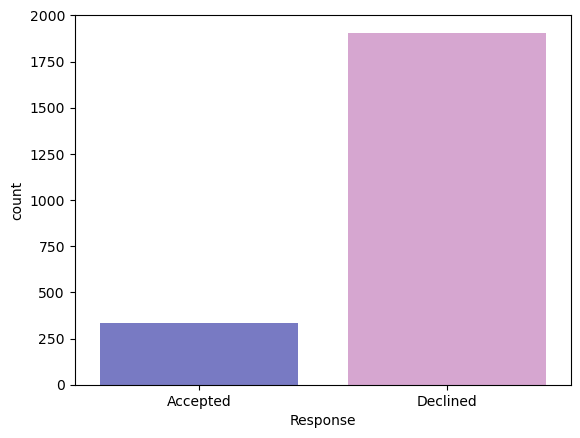

In [26]:
#distribution of the target varible
sns.countplot(x='Response', data=df)

#print the percent of each variable
percentages = df['Response'].value_counts(normalize=True) * 100
print("Percentages of the response/target variable:")
for value, percentage in percentages.items():
    print(f"{value}: {percentage:.2f}%")

In [27]:
#function to plot a few at once
def subplots(plot, h, w, var_list,data, palette = tab20b_colors_list, hue=None):
    i=1
    
    for x in var_list:
        plt.subplot(h,w,i)
        plot(x=x, palette=palette, data=data, hue=hue,edgecolor=None)
        plt.ylabel('')
        i+=1

I created count plots for the qualitative variables. About 50% of customers have a graduation level education, while 50-100 customers have a basic level of education. Majority of the customers are married or living together and a small number of unknown marital status. Most shoppers have 0-1 kids and teens living at home. Very few customers complained in the last 2 years.

The number of deals purchased, number of web, catalog, and in store purchases are all right skewed. The peaks are at 1,2,0 and 3 purchases respectively. Web visits last month is left skewed with a peak at 7 visits.


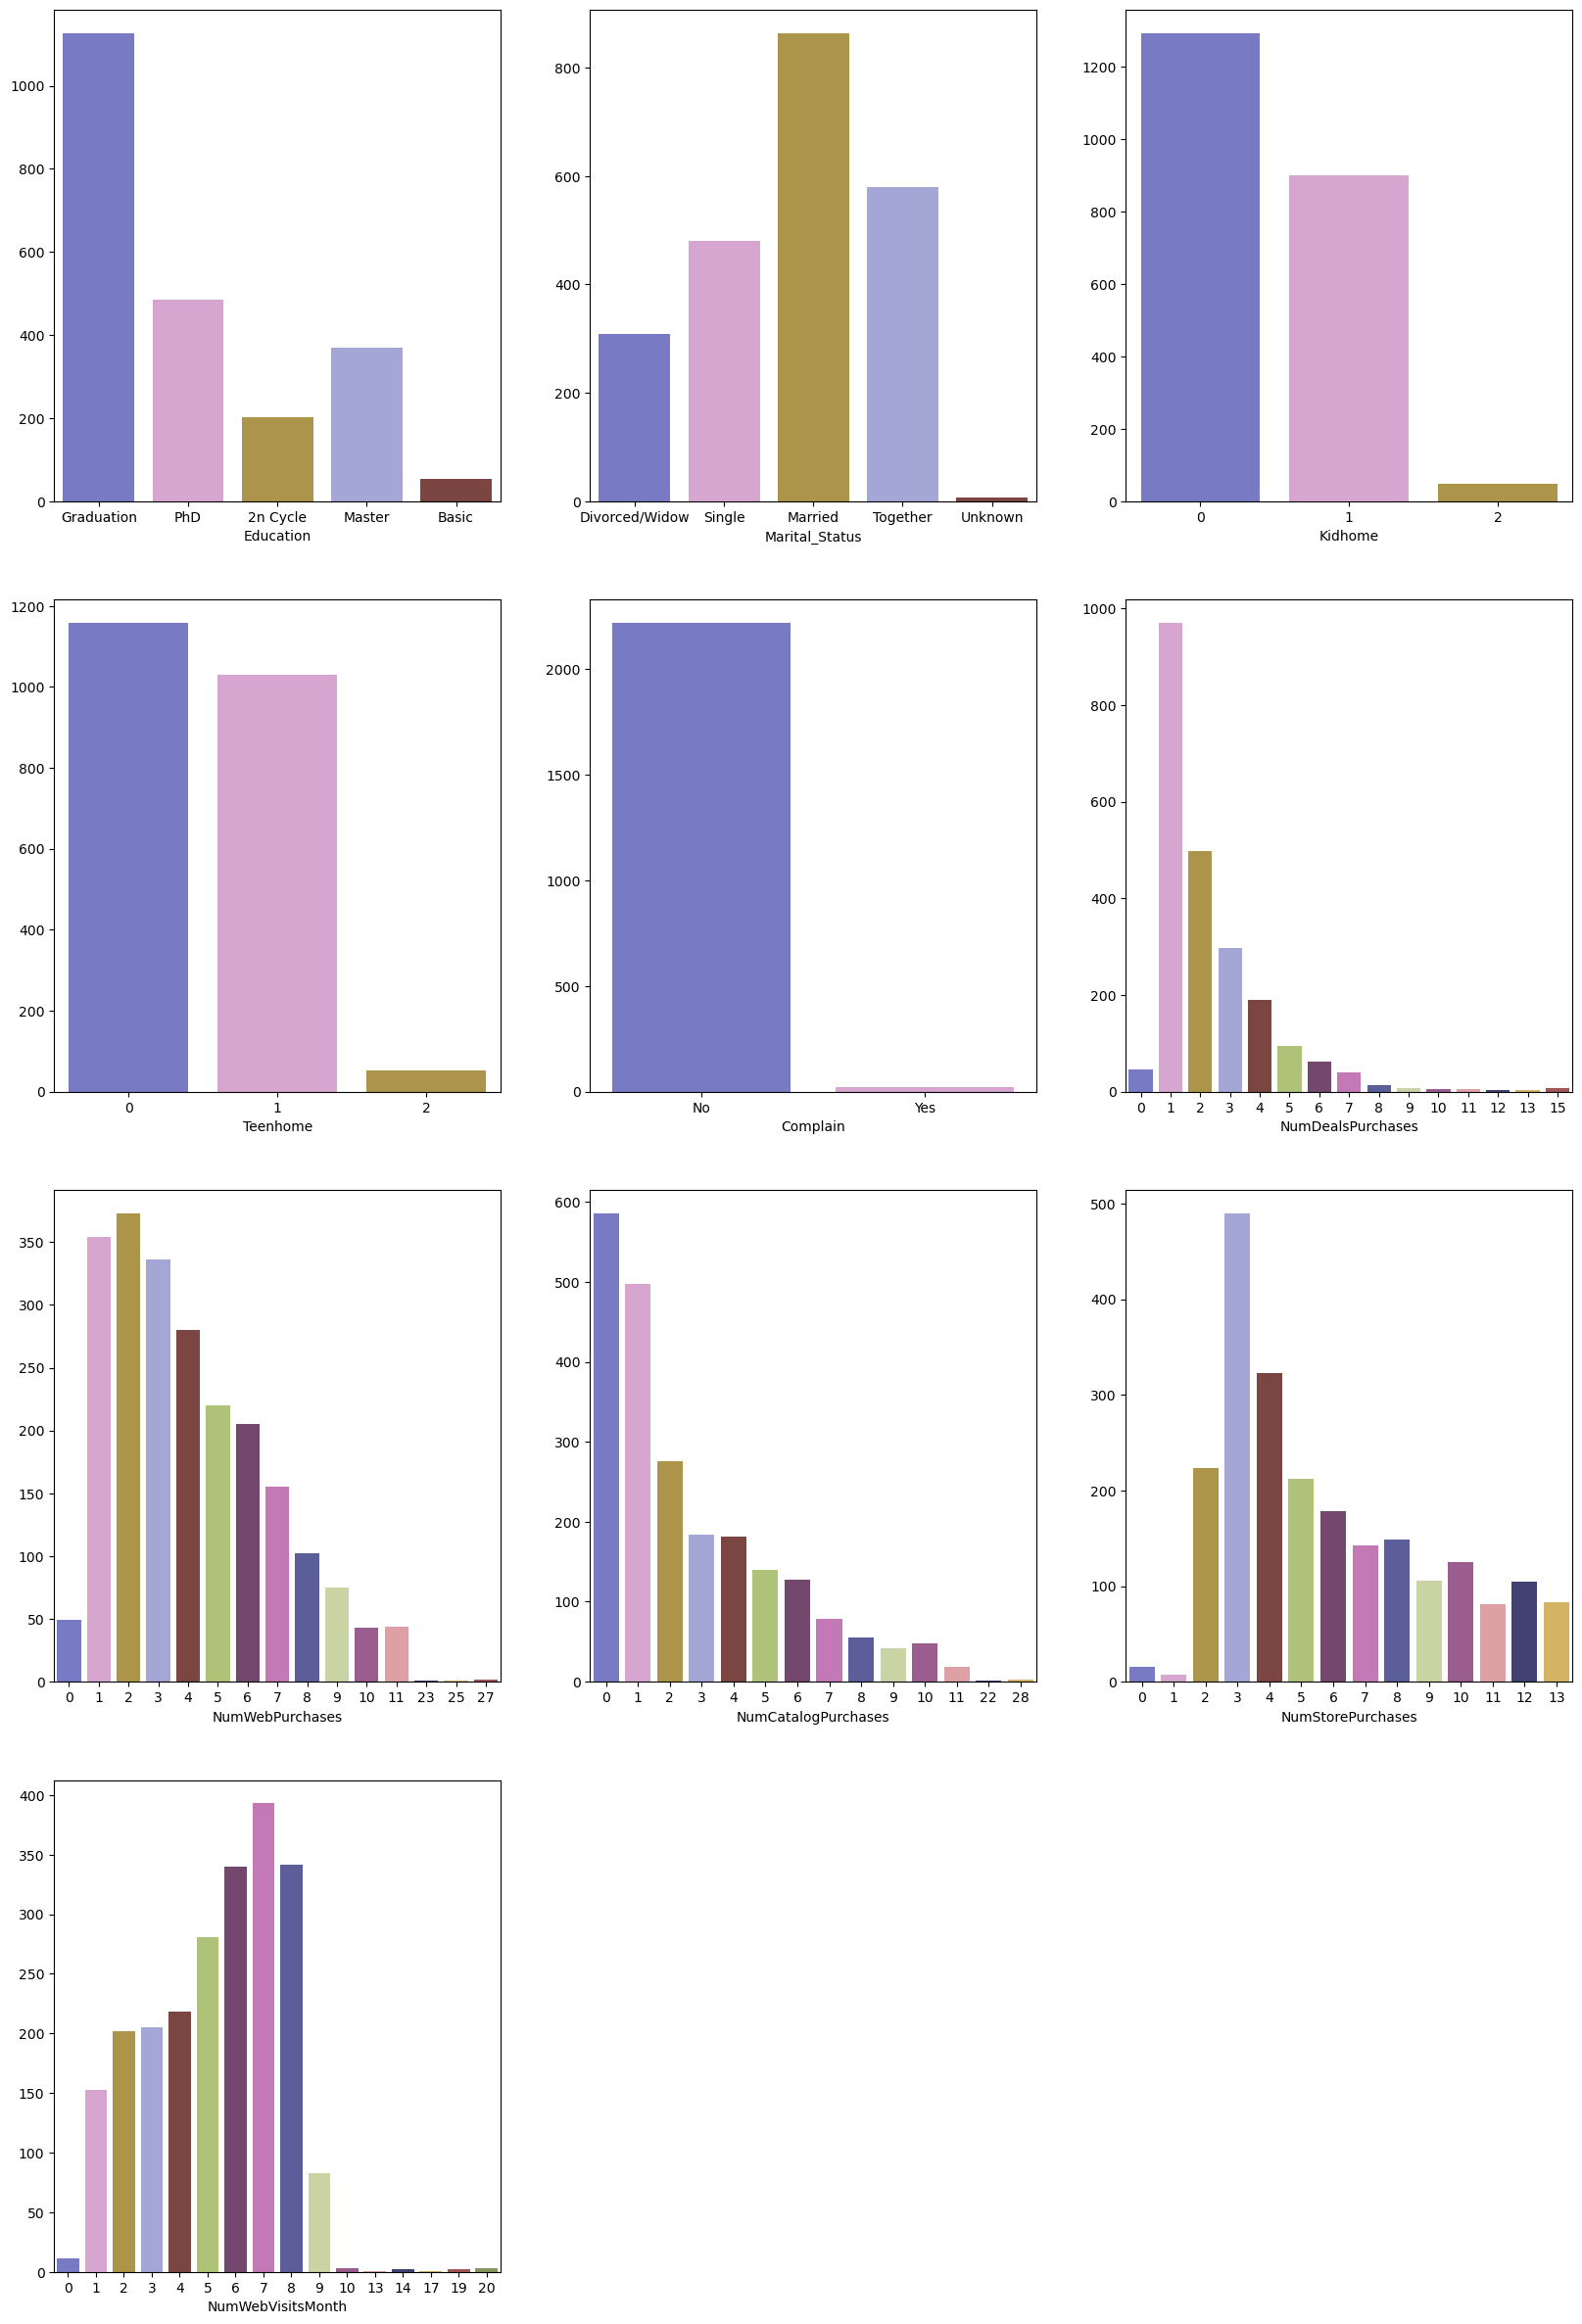

In [34]:
var_list = ['Education','Marital_Status','Kidhome', 'Teenhome', 'Complain', 'NumDealsPurchases','NumWebPurchases', 
            'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']
plt.figure(figsize = (20,30))
subplots(sns.countplot, 4,3,var_list, df)

When the plots are separated by response no significant  patterns are found.

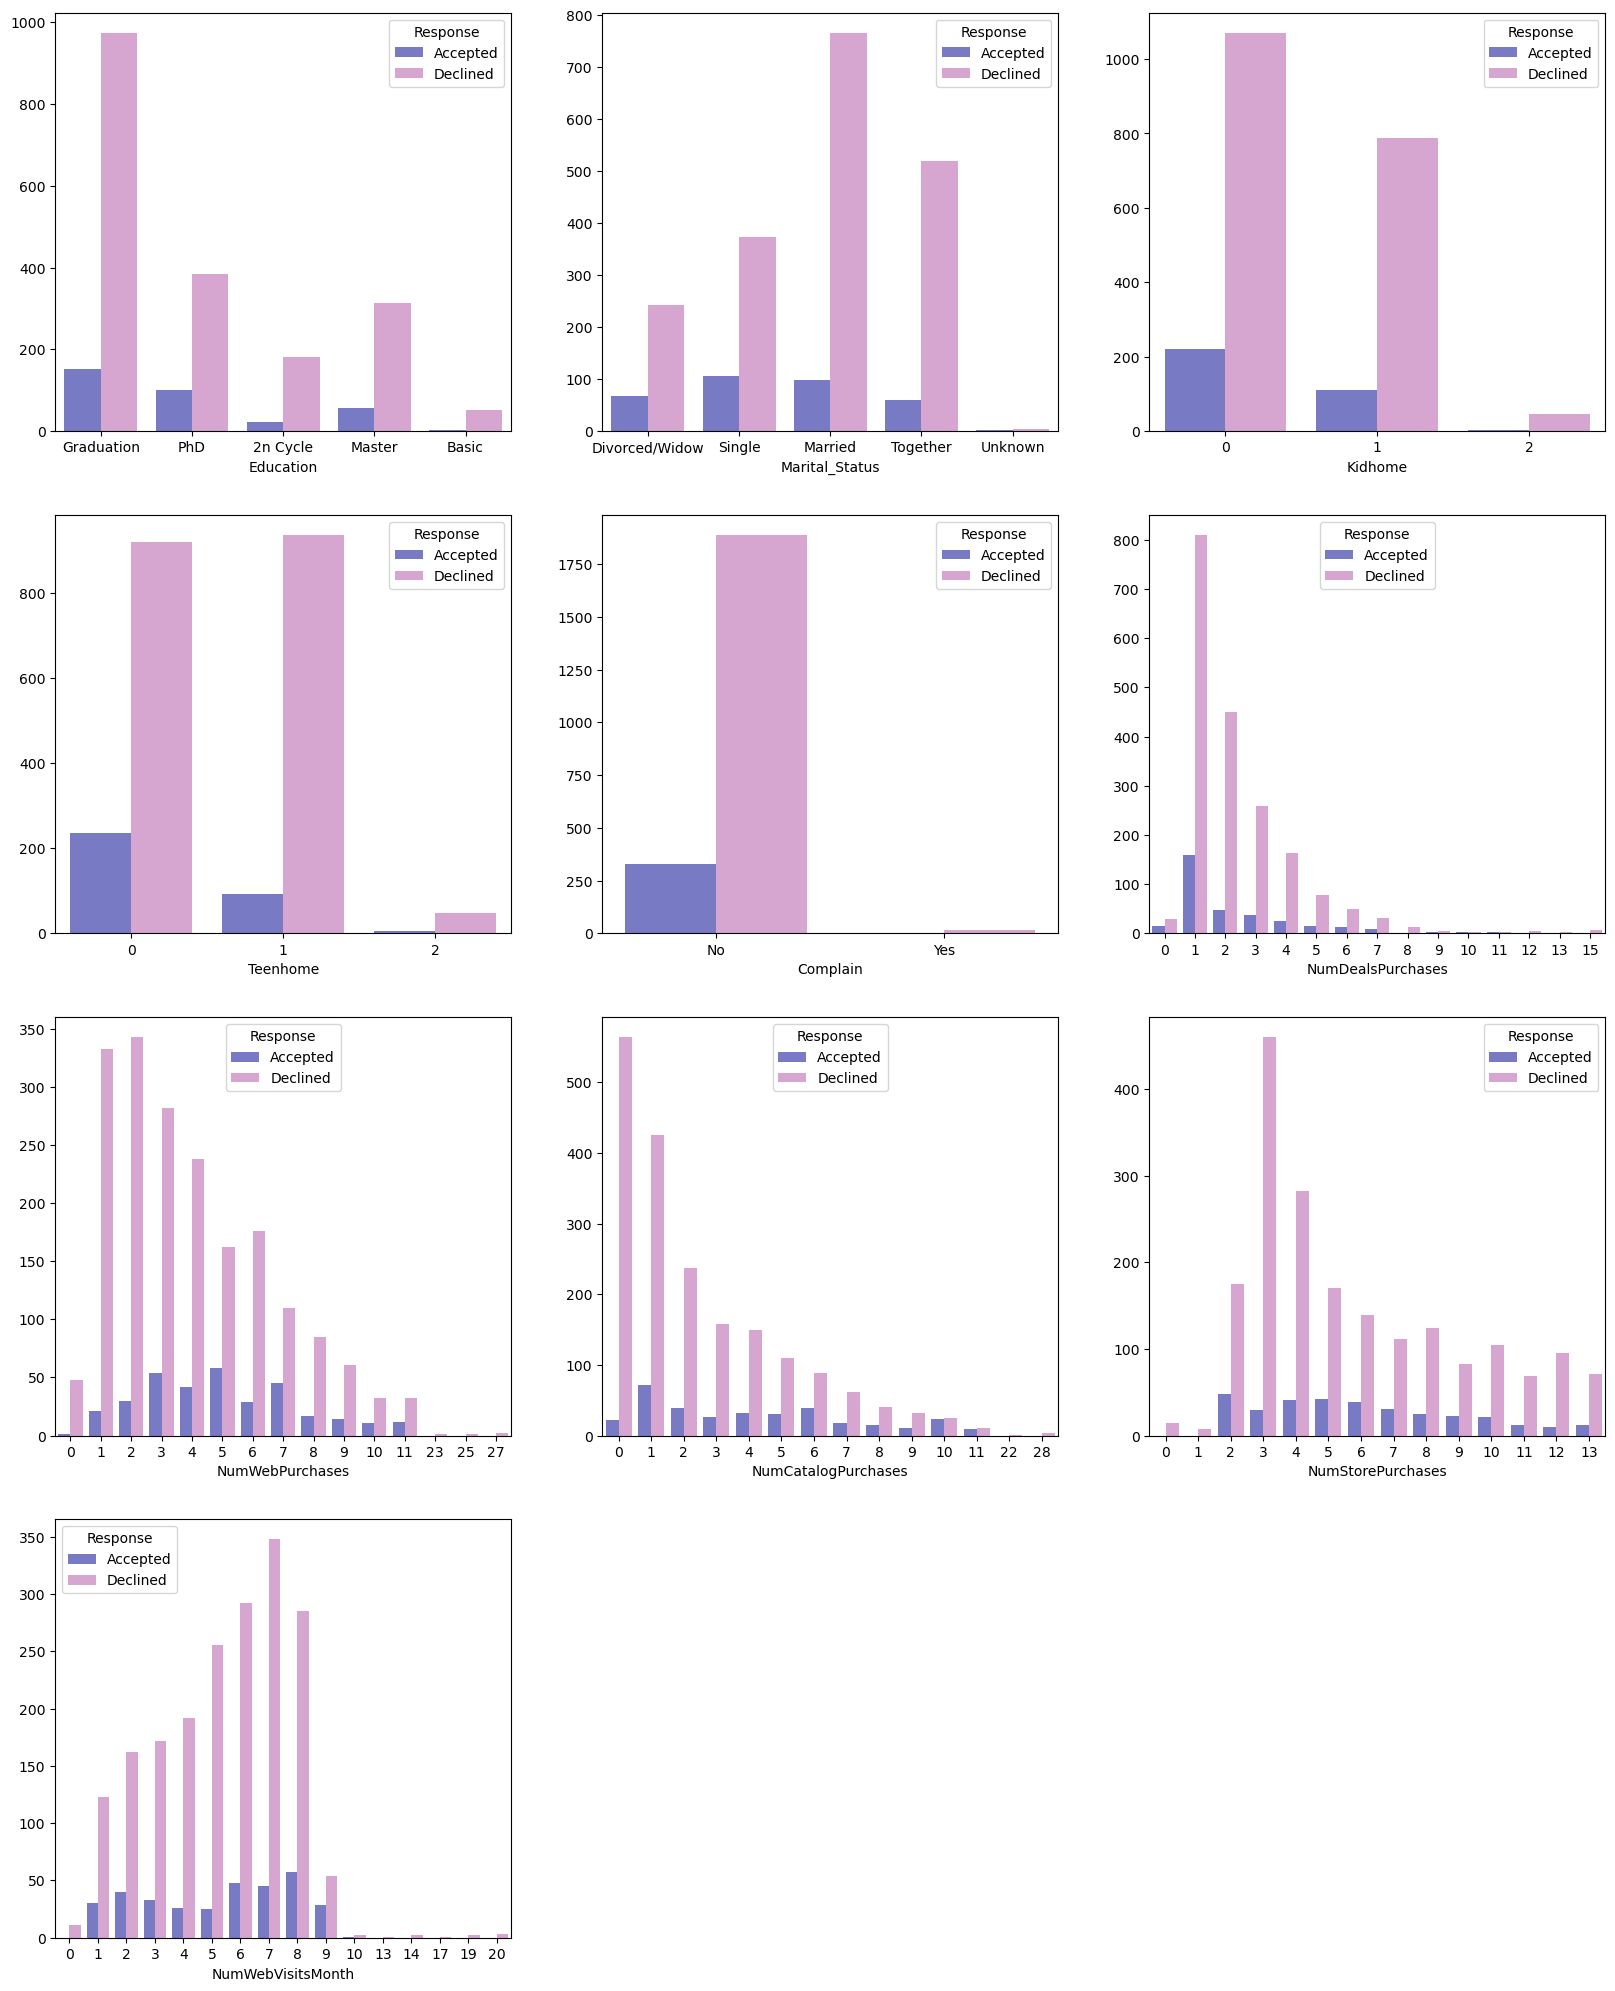

In [28]:
var_list = ['Education','Marital_Status','Kidhome', 'Teenhome', 'Complain', 'NumDealsPurchases','NumWebPurchases', 
            'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']
plt.figure(figsize = (20,25))
subplots(sns.countplot, 4,3,var_list, df, hue='Response')

I plotted the quantitative data using histograms. Income and age are normally distributed. Tenure is also normally distributed but more spread out. Recency is evenly distributed from 0 to 100 days. All product type purchases are right skewed starting from 0.

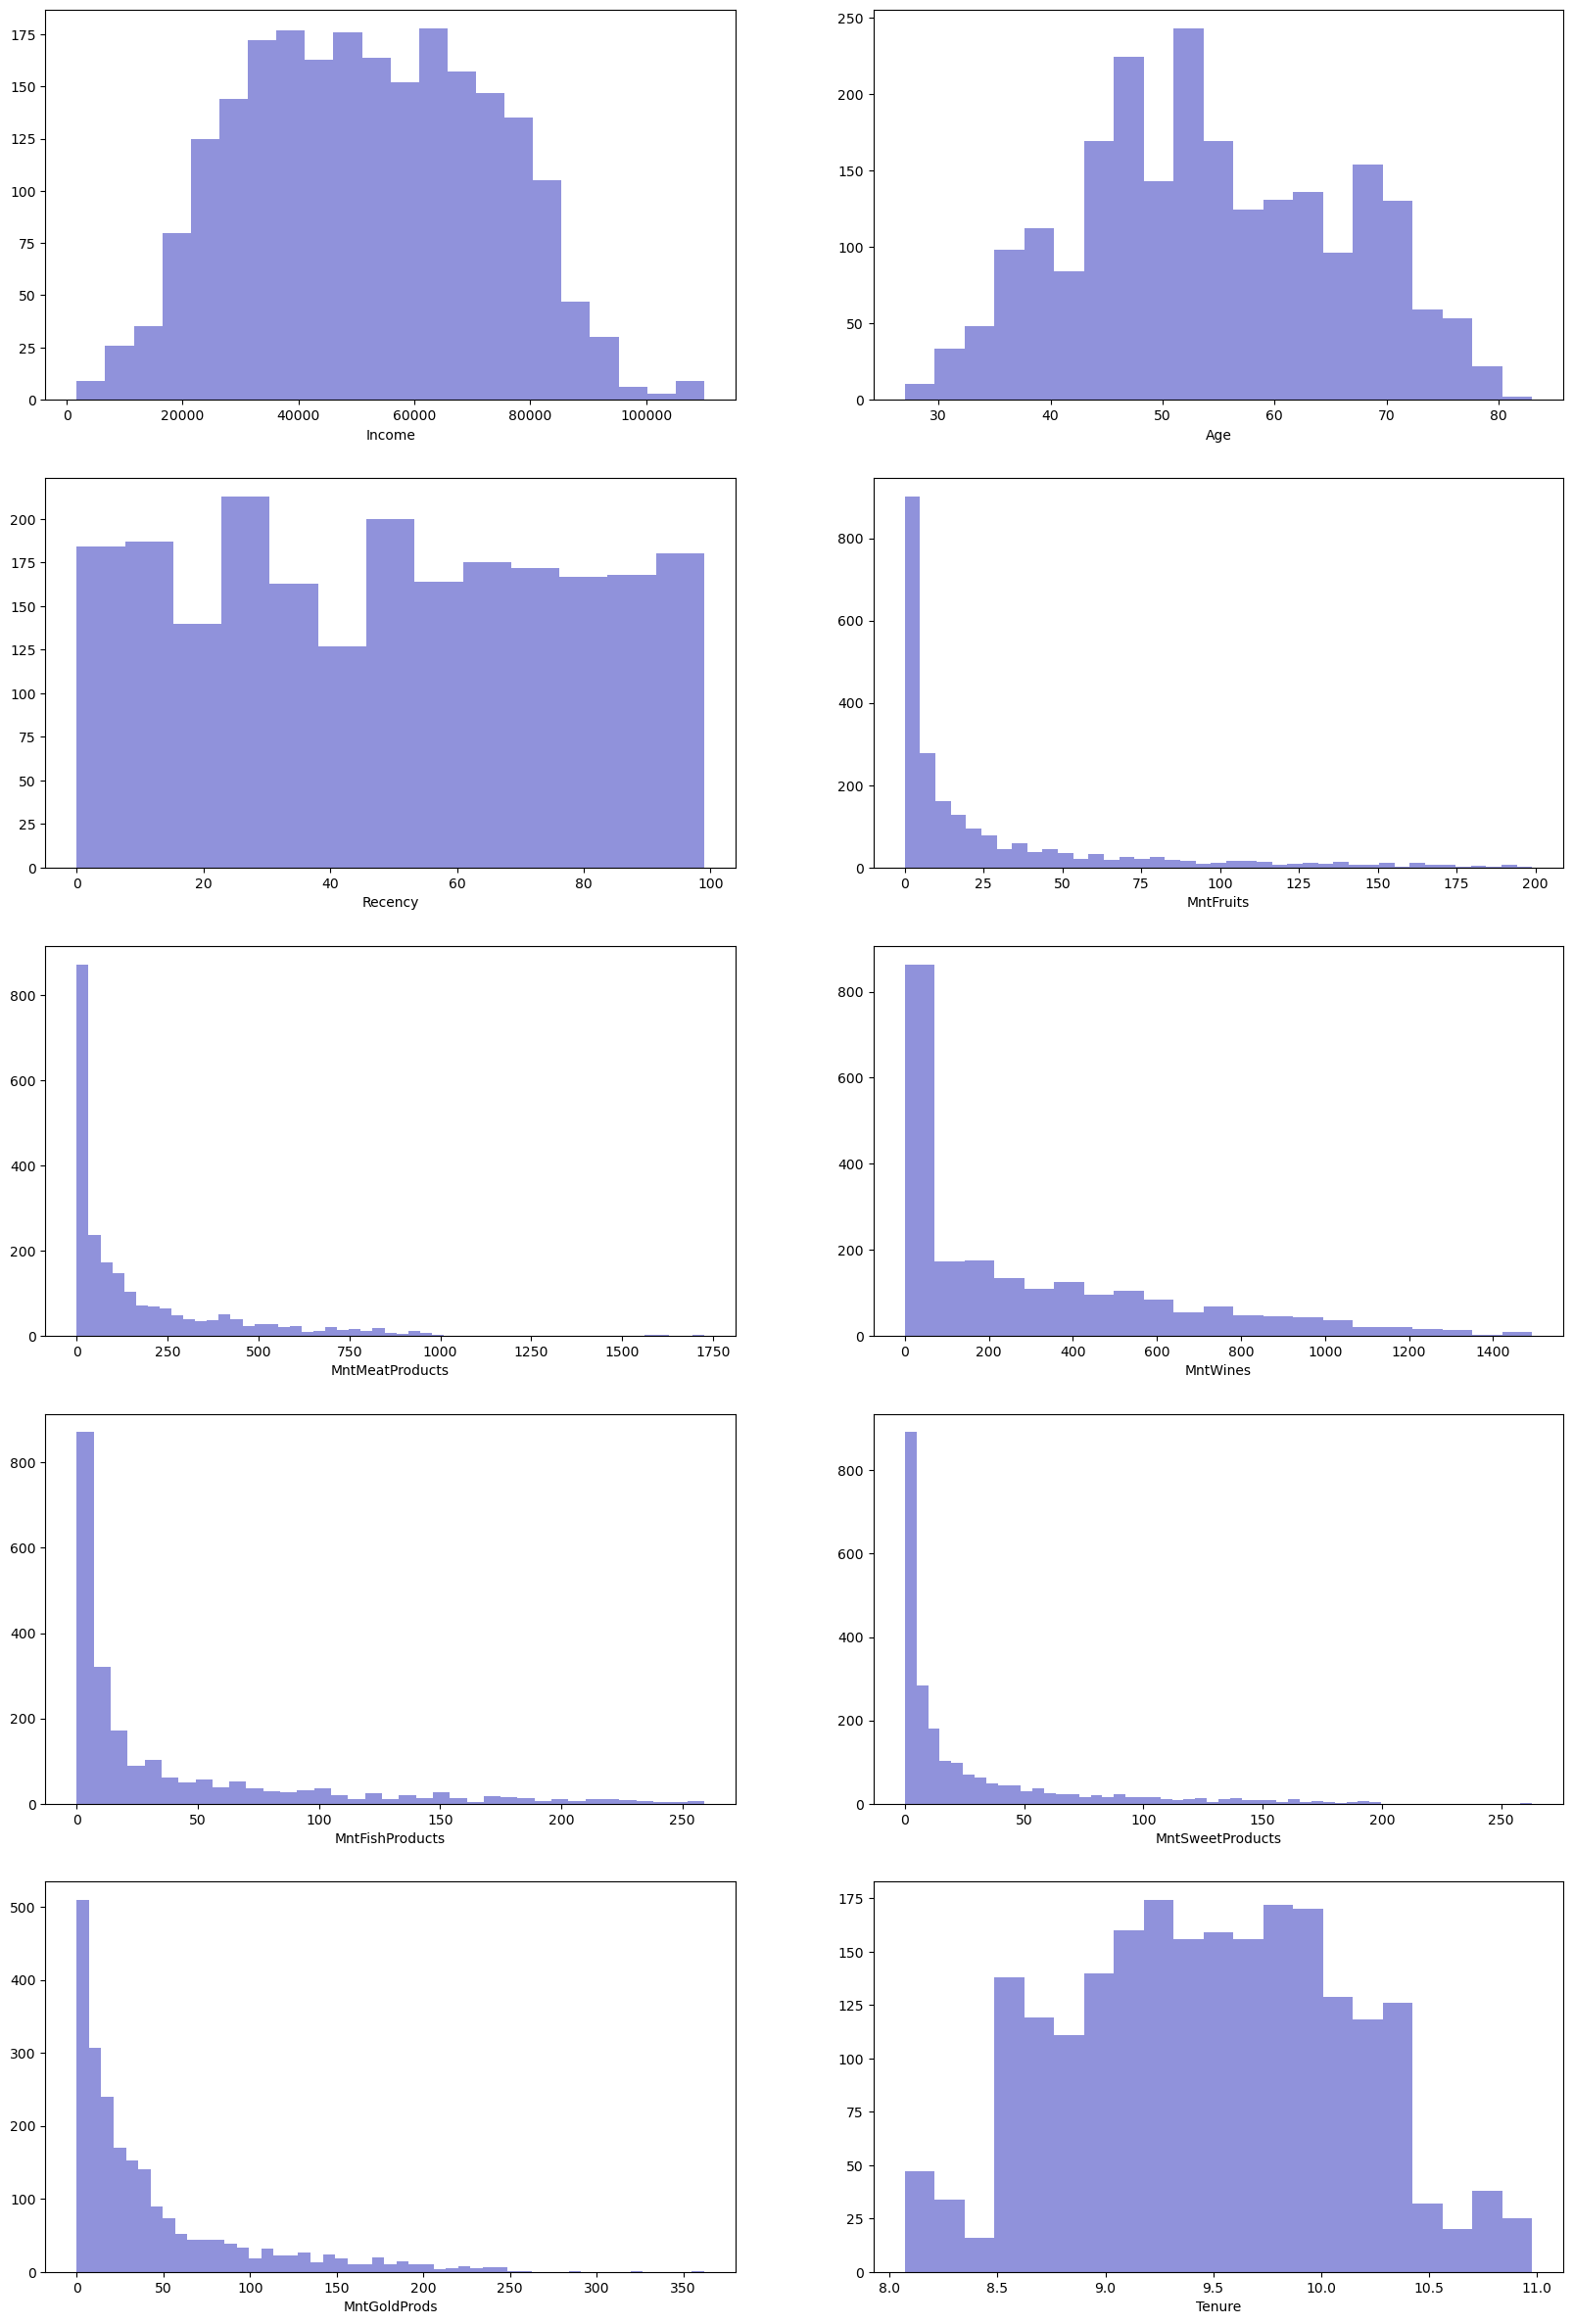

In [36]:
var_list = ['Income', 'Age', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntWines', 
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Tenure']

plt.figure(figsize = (20,30))
subplots(sns.histplot, 5,2,var_list,df)

When I separate the continuous variables by response a few patterns are shown. The income distribution is still normal but for those who accepted it is shifted to the right. There is a higher median income. Recency has a slight right skew for those who responded positively to the campaign. Before, the number of gold products bought had a strong right skew. Now, for the customers that said yes, it is a more even distribution. Tenure also changed for positive responses. It shifted the right with a slight left skew.

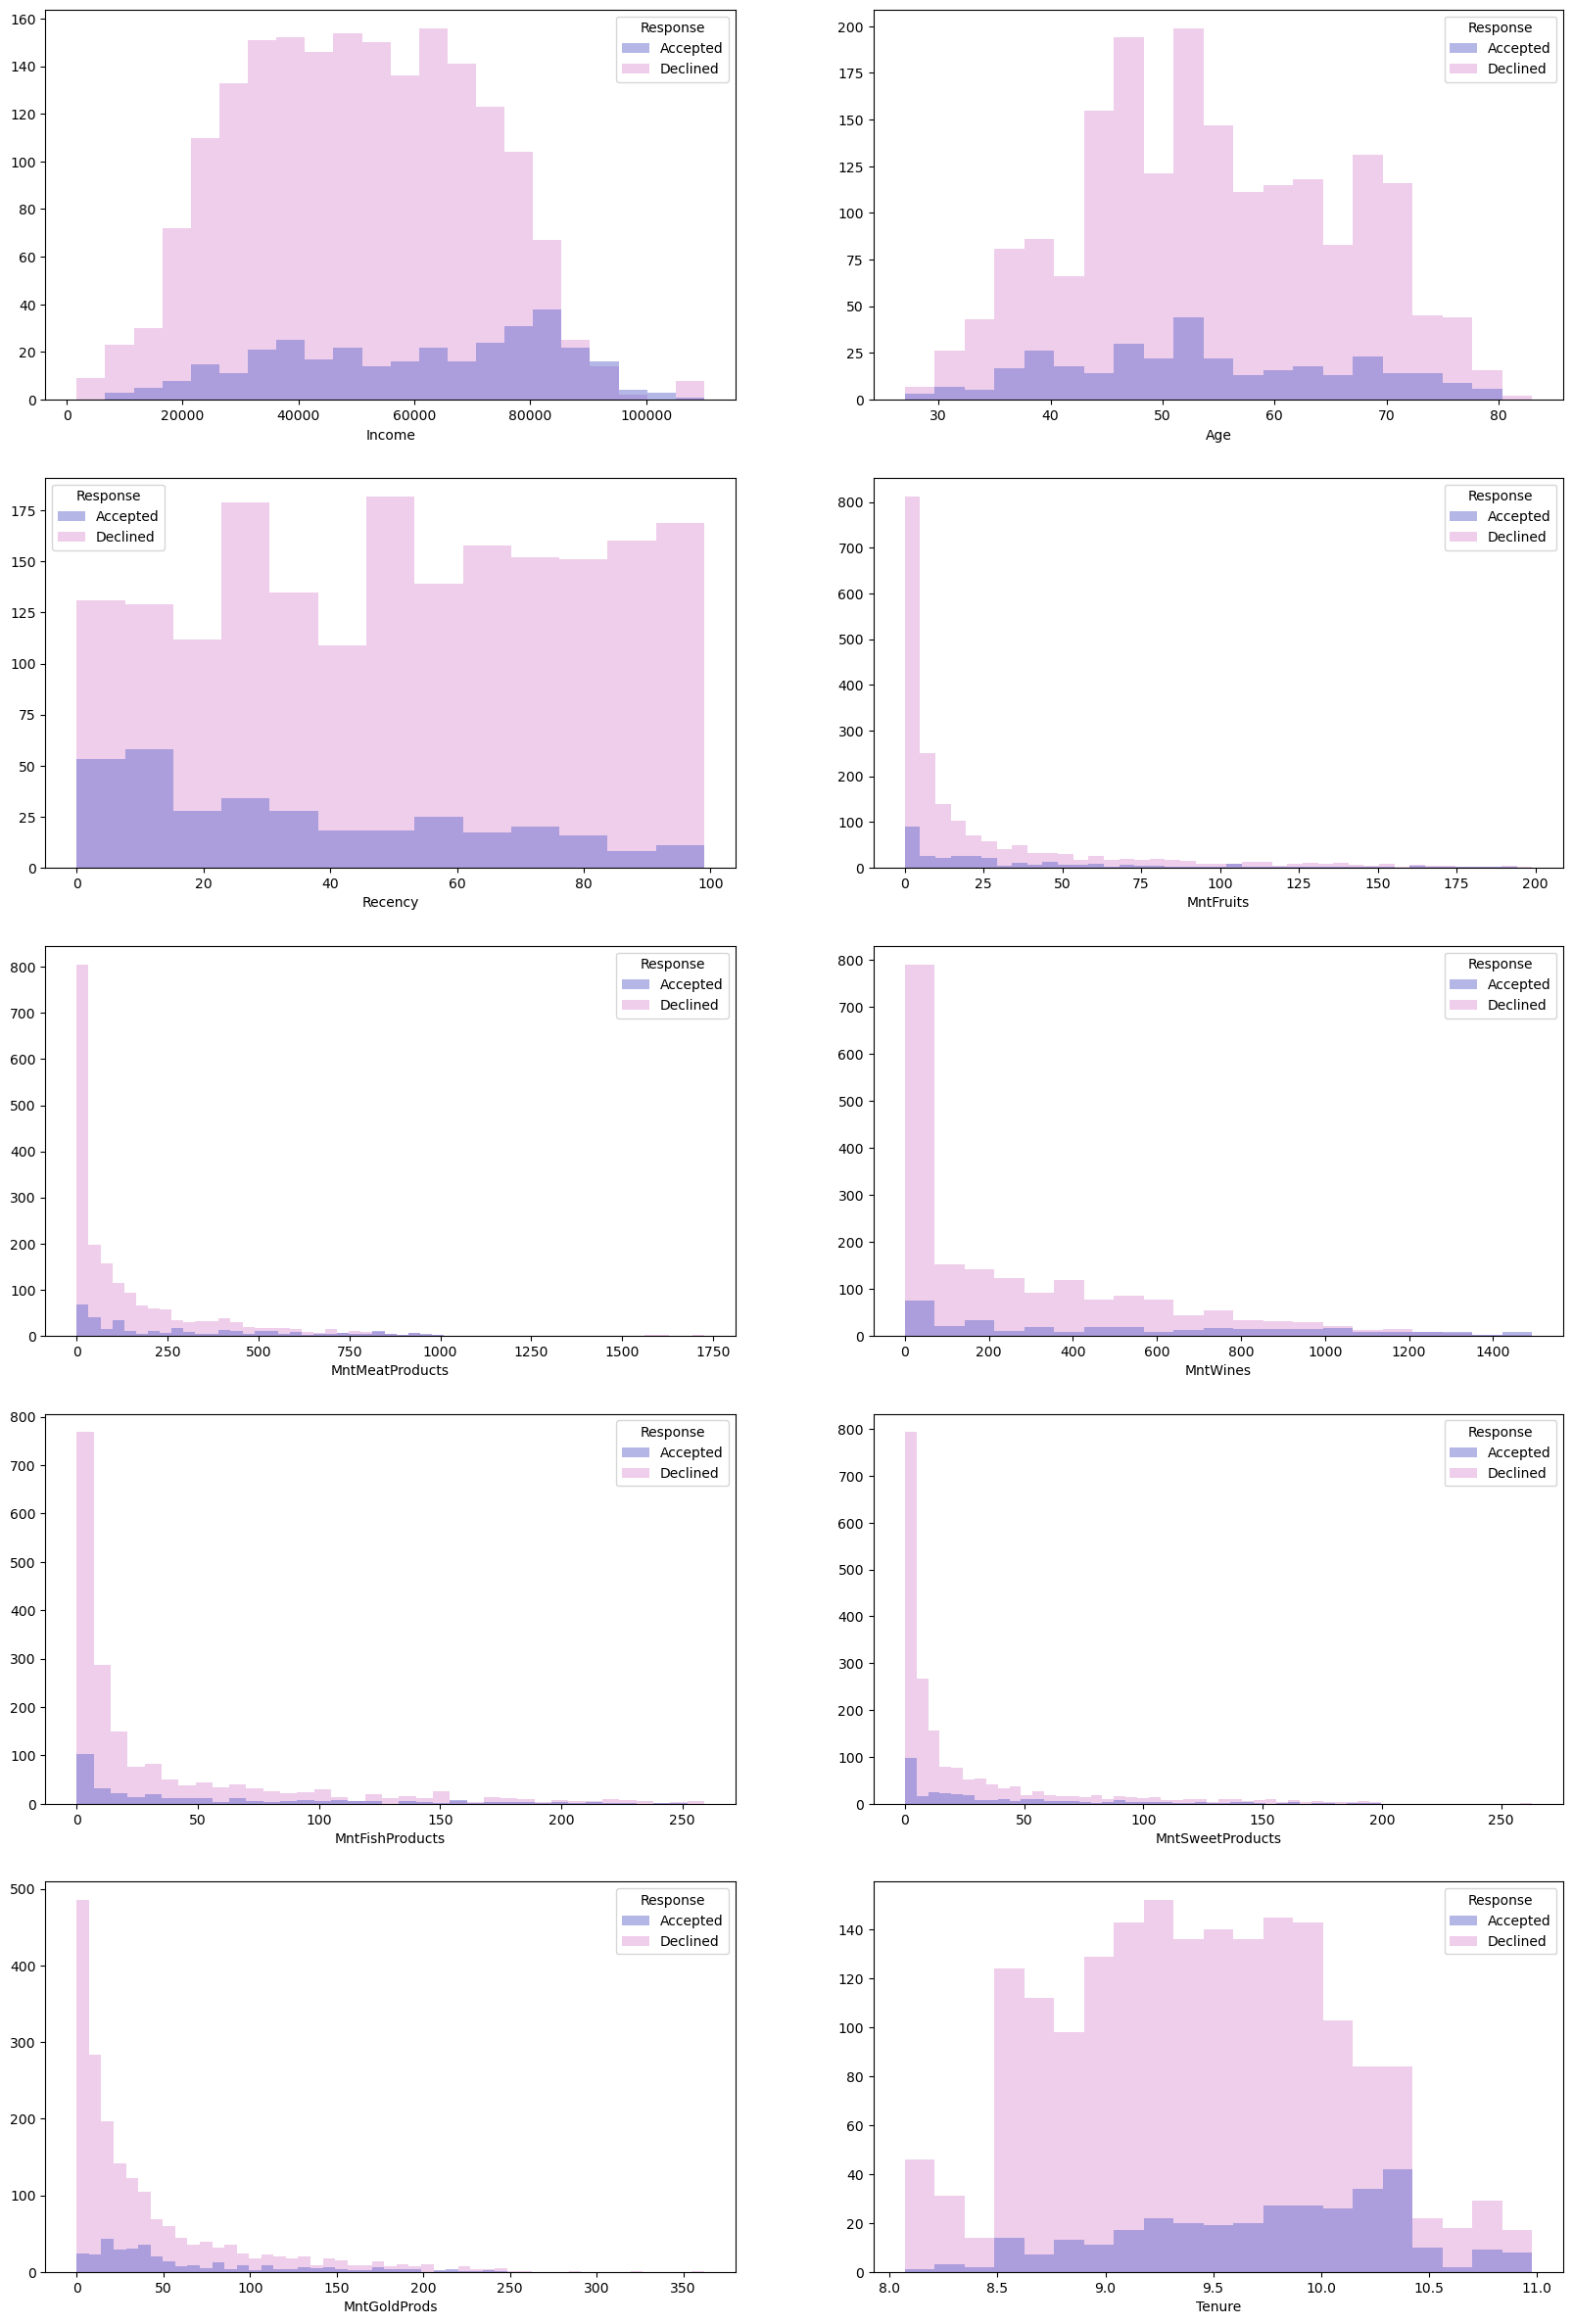

In [37]:
var_list = ['Income', 'Age', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntWines',
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Tenure']

plt.figure(figsize = (20,30))
subplots(sns.histplot, 5,2,var_list,df, hue='Response', palette=None)

A few features have outliers so I gave an upper limit to these variables.

In [38]:
df['NumDealsPurchases'] = df['NumDealsPurchases'].clip(upper=12)
df['NumWebPurchases'] = df['NumWebPurchases'].clip(upper=18)
df['NumCatalogPurchases'] = df['NumCatalogPurchases'].clip(upper=18)
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].clip(upper=13)
df['MntFruits'] = df['MntFruits'].clip(upper=170)
df['MntMeatProducts'] = df['MntMeatProducts'].clip(upper=1250)
df['MntSweetProducts'] = df['MntSweetProducts'].clip(upper=200)
df['MntGoldProds'] = df['MntGoldProds'].clip(upper=250)
df['MntWines'] = df['MntWines'].clip(upper=1350)

## Correlation of the Data


In [40]:
corr_df = df.copy()
label_encoders = {}
for column in corr_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    corr_df[column] = le.fit_transform(corr_df[column])
    label_encoders[column] = le

A correlation heatmap gives a lot of information about some of the features in the dataset. There are no strong correlations of the target variable (Response) to any other variable but there is a lot of correlations among the other variables. The different types of products purchased have strong correlations to each other. I might remove some of them for linear predictive models. Income is also correlated with many other features. 

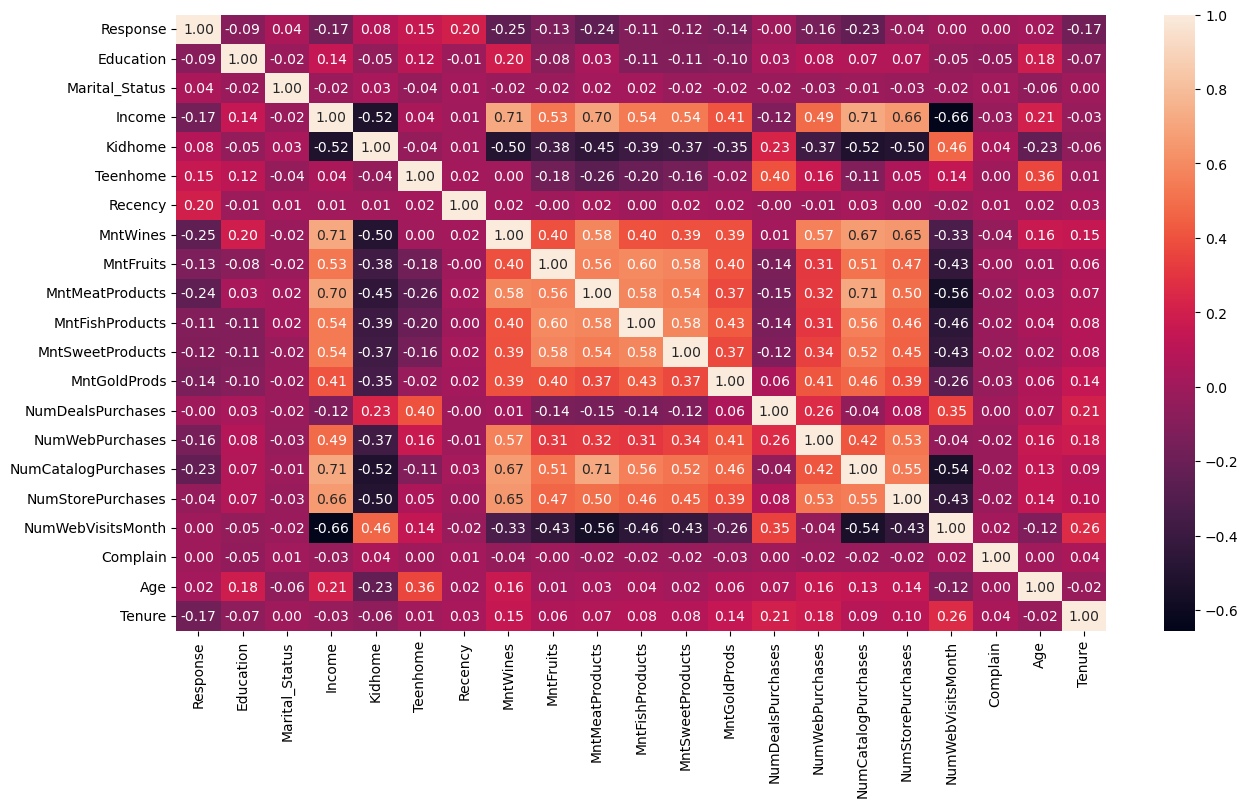

In [41]:
corr_matrix = corr_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# Feature Transformation

I changed all the features to be numerical so it can easily be used in a machine learning model

In [44]:
df.Response = df.Response.replace({'Declined': 0, 'Accepted':1})
df.Complain = df.Complain.replace({'No':0, 'Yes':1})
df.Education = df.Education.replace({'Basic': 0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4})

cetegoricals = ['Marital_Status']
onehot_encoder = OneHotEncoder(sparse=False, drop=None)
df_encoded = onehot_encoder.fit_transform(df[cetegoricals])
encoded_df = pd.DataFrame(df_encoded, columns=onehot_encoder.get_feature_names_out(cetegoricals))
df = df.drop(cetegoricals, axis=1)
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [45]:
df.head()

,Response,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Tenure,Marital_Status_Divorced/Widow,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Unknown
0,1,2,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,53.0,8.54,1.0,0.0,0.0,0.0,0.0
1,1,2,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,62.0,8.55,0.0,0.0,1.0,0.0,0.0
2,0,2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,65.0,8.64,0.0,1.0,0.0,0.0,0.0
3,0,2,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,56.0,8.16,0.0,0.0,0.0,1.0,0.0
4,1,2,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,0,34.0,8.41,0.0,0.0,1.0,0.0,0.0


In [46]:
df.to_csv('superstore_data_clean.csv', index=False)